<a href="https://colab.research.google.com/github/Raziel-JKM/Finance_AI/blob/main/Code/FAI_Lec_6_3_Factor_Model_FF_Five_Factor_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FAI Lec 6-2 Factor Model : Fama-French Five-Factor Model

금융AI

중앙대학교 금융공학

유시용 (sy61@cau.ac.kr)

본 코드는 중앙대학교 금융공학융합전공의 "금융AI"과목과 KMOOC(http://www.kmooc.kr/)의 "금융AI"과목에 사용된 코드입니다. 출처를 밝히셔도 되고, 자유롭게 사용하셔도 됩니다. 

# Asset Pricing Models


주가수익률에 대한 중요한 가격결정모형을 간략하게 소개하고자 한다 : CAPM, Fama-French 3 Factor, Fama-French 5 factor


## Capital Asset Pricing Model (CAPM)

자본자산 가격결정 모형(Capital Asset Pricing Model, CAPM)은 자본시장의 균형하에서 위험이 존재하는 자산의 균형수익률을 도출해내는 모형이다. 

CAPM은 계적인 위험과 자산의  기대 수익 간의 관계를 설명한다. 체계적 위험은 시장요인(즉, $ r_m-r_f$)이다. 

\begin{eqnarray*}
E{r}_i - r_f = \beta_i (E(r_m) - r_f) 
\end{eqnarray*}	

$E(r_i)$: 주식 $i$의 기대수익률. 

$r_f$: 무위험자산 수익률 (US 3-month Treasury bill) 

$E(r_m)$: 시장기대수익률 

실증분석에서는 다음과 같이 표현되기도 한다: 

\begin{eqnarray*}
E(r_i) - r_f = \alpha_i + \beta_i (E(r_m) -r_f)  \\
r_i - r_f = \alpha_i + \beta_i (r_m -r_f) +\varepsilon_i
\end{eqnarray*}


## Fama-French 3-factor (FF3)

Fama-French F3요인모형(1993): 시장요인(MKT), 규모요인(SMB), 가치요인(HML)


\begin{eqnarray*}
r_i - r_f = \alpha_i + \beta_i MKT + s_i SMB + h_i HML +\varepsilon_i
\end{eqnarray*} 

시장요인 MKT: ($r_m -r_f$): $r_m-r_f$

규모요인 SMB (Small Minus Big):  $r$(small cap) $-$ $r$(large cap)

가치요인 HML (High Minus Low):  $r$(high B/M) $-$ $r$(low B/M)



## Fama-French 5-factor (FF5)

FF5요인모형(2015): 3요인 모형에 추가로 수익성요인, 투자요인을 첨가

\begin{eqnarray*}
r_i - r_f = \alpha_i + \beta_{mi} MKT + \beta_{si} SMB + \beta_{hi} HML + \beta_{ri} RMW + \beta_{ci} CMA+\varepsilon_i
\end{eqnarray*}

수익성(이익)요인 RMW (Robust - Weak): $r$(high operating profit) $-$ $r$(low operating profit), (Novy-Marx, 2013)

투자요인 CMA (Conservative - Aggressive): $r$(investing less) $-$ $r$(investing more), (Fama and French, 2015) 




### References

Ken French’s Data Library : mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html 

Fama, E F; French, K R (1993). Common risk factors in the returns on stocks and bonds. Journal of Financial Economics. 33: 3-56.

Fama, E F; French, K R (2015). A Five-Factor Asset Pricing Model. Journal of Financial Economics, 116, 1–22.

Novy-Marx, R. (2013). The Other Side of Value: The Gross Profitability Premium. Journal of Financial Economics, 108, 1-28. 

### Fama-French Data (Ken French’s Data Library)

**class** pandas_datareader.famafrench.**FamaFrenchReader(symbols, start=None, end=None, retry_count=3, pause=0.1, timeout=30, session=None, freq=None)**

Get data for the given name from the Fama/French data library.

For annual and monthly data, index is a pandas.PeriodIndex, otherwise it’s a pandas.DatetimeIndex.

In [ ]:
# 필요한 라이브러리들을 불러보아요 

import pandas as pd
import numpy as np 
import datetime as dt
import pandas_datareader.data as pdr
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

### 종속변수 데이터를 모아 보아요 

In [ ]:
# 표본시간을 정해보아요. 

end = dt.datetime.today()
start = dt.datetime(2000,1,1)

# 선택하고싶은 주식이나 펀드를 선택해보아요. 

snp = pdr.DataReader('^GSPC','yahoo',start,end) # S&P500
apl = pdr.DataReader('AAPL','yahoo',start,end) # Apple
ggl = pdr.DataReader('GOOG','yahoo',start,end) # Google
tsl = pdr.DataReader('TSLA','yahoo',start,end) # Tesla 
nfx = pdr.DataReader('NFLX','yahoo',start,end) # Netfix
fb = pdr.DataReader('FB','yahoo',start,end) # Faceboob

fid = pdr.DataReader('FDGRX', 'yahoo', start, end) # FIdelity funds 

In [ ]:
apl.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1999-12-31,0.918527,0.888393,0.901228,0.917969,163811200.0,0.793253
2000-01-03,1.004464,0.907924,0.936384,0.999442,535796800.0,0.863657
2000-01-04,0.987723,0.903460,0.966518,0.915179,512377600.0,0.790842
2000-01-05,0.987165,0.919643,0.926339,0.928571,778321600.0,0.802415
2000-01-06,0.955357,0.848214,0.947545,0.848214,767972800.0,0.732975


In [ ]:
# Adjusted Cloase Price만을 따로 모아보아요. 
stk = pd.DataFrame({
    'snp': snp['Adj Close'],
    'apl': apl['Adj Close'],
    'ggl': ggl['Adj Close'],
    'tsl': tsl['Adj Close'],
    'nfx': nfx['Adj Close'],
    'fb': fb['Adj Close'],
    'fid': fid['Adj Close']
}).dropna()

In [ ]:
stk.head()

,snp,apl,ggl,tsl,nfx,fb,fid
Date,,,,,,,
2012-05-18,1295.219971,16.368652,299.078979,5.512,9.994286,38.230000,5.939693
2012-05-21,1315.989990,17.322281,305.908386,5.754,10.248571,34.029999,6.102490
2012-05-22,1316.630005,17.189274,299.278229,6.160,9.672857,31.000000,6.092274
2012-05-23,1318.859985,17.608683,303.592072,6.204,10.272857,32.000000,6.131780
2012-05-24,1320.680054,17.446974,300.702881,6.056,10.038571,33.029999,6.115432


In [ ]:
# 수익률을 계산 (%)
s_ret= stk.pct_change()*100
s_ret.columns=['r_snp', 'r_apl', 'r_ggl', 'r_tsl', 'r_nfx', 'r_fb', 'r_fid'] 
s_ret


,r_snp,r_apl,r_ggl,r_tsl,r_nfx,r_fb,r_fid
Date,,,,,,,
2012-05-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-05-21,1.603590,5.825944,2.283479,4.390423,2.544312,-10.986139,2.740831
2012-05-22,0.048634,-0.767838,-2.167367,7.055955,-5.617506,-8.903905,-0.167419
2012-05-23,0.169370,2.439945,1.441415,0.714288,6.202918,3.225806,0.648468
2012-05-24,0.138003,-0.918347,-0.951669,-2.385554,-2.280625,3.218746,-0.266609
...,...,...,...,...,...,...,...
2020-10-28,-3.528788,-4.631219,-5.462956,-4.393898,-0.550182,-5.513783,-3.661972
2020-10-29,1.194733,3.705039,3.337685,1.184670,3.695706,4.916491,1.137097
2020-10-30,-1.212955,-5.601803,3.430873,-5.547302,-5.646457,-6.309868,-2.762604


In [ ]:
# 가격 데이터와 수익률 데이트를 머지해주어요. 

stock = pd.merge(stk,s_ret, left_index=True, right_index=True, how='inner')
stock

,snp,apl,ggl,tsl,nfx,fb,fid,r_snp,r_apl,r_ggl,r_tsl,r_nfx,r_fb,r_fid
Date,,,,,,,,,,,,,,
2012-05-18,1295.219971,16.368652,299.078979,5.512000,9.994286,38.230000,5.939693,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-05-21,1315.989990,17.322281,305.908386,5.754000,10.248571,34.029999,6.102490,1.603590,5.825944,2.283479,4.390423,2.544312,-10.986139,2.740831
2012-05-22,1316.630005,17.189274,299.278229,6.160000,9.672857,31.000000,6.092274,0.048634,-0.767838,-2.167367,7.055955,-5.617506,-8.903905,-0.167419
2012-05-23,1318.859985,17.608683,303.592072,6.204000,10.272857,32.000000,6.131780,0.169370,2.439945,1.441415,0.714288,6.202918,3.225806,0.648468
2012-05-24,1320.680054,17.446974,300.702881,6.056000,10.038571,33.029999,6.115432,0.138003,-0.918347,-0.951669,-2.385554,-2.280625,3.218746,-0.266609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-28,3271.030029,111.199997,1516.619995,406.019989,486.239990,267.670013,30.780001,-3.528788,-4.631219,-5.462956,-4.393898,-0.550182,-5.513783,-3.661972
2020-10-29,3310.110107,115.320000,1567.239990,410.829987,504.209991,280.829987,31.129999,1.194733,3.705039,3.337685,1.184670,3.695706,4.916491,1.137097
2020-10-30,3269.959961,108.860001,1621.010010,388.040009,475.739990,263.109985,30.270000,-1.212955,-5.601803,3.430873,-5.547302,-5.646457,-6.309868,-2.762604


In [ ]:
# 수익률 기초통계표 
df=s_ret
stats = df.describe()
stats.loc['var'] = df.var().tolist()
stats.loc['skew'] = df.skew().tolist()
stats.loc['kurt'] = df.kurtosis().tolist()
print(stats)

             r_snp        r_apl        r_ggl        r_tsl        r_nfx  \
count  2129.000000  2129.000000  2129.000000  2129.000000  2129.000000   
mean      0.050636     0.105998     0.093042     0.264754     0.227285   
std       1.067129     1.802451     1.604490     3.494838     3.024778   
min     -11.984055   -12.864692   -11.100820   -21.062826   -25.015550   
25%      -0.313576    -0.692274    -0.621170    -1.397750    -1.177587   
50%       0.063303     0.089080     0.068613     0.130084     0.047600   
75%       0.511684     1.016139     0.882953     1.854400     1.547135   
max       9.382774    11.980821    16.052431    24.395054    42.223510   
var       1.138765     3.248830     2.574388    12.213893     9.149279   
skew     -0.670789    -0.215006     0.659223     0.440921     1.711386   
kurt     20.723235     6.990754    12.046083     6.249421    26.231785   

              r_fb        r_fid  
count  2129.000000  2129.000000  
mean      0.118620     0.085626  
std      

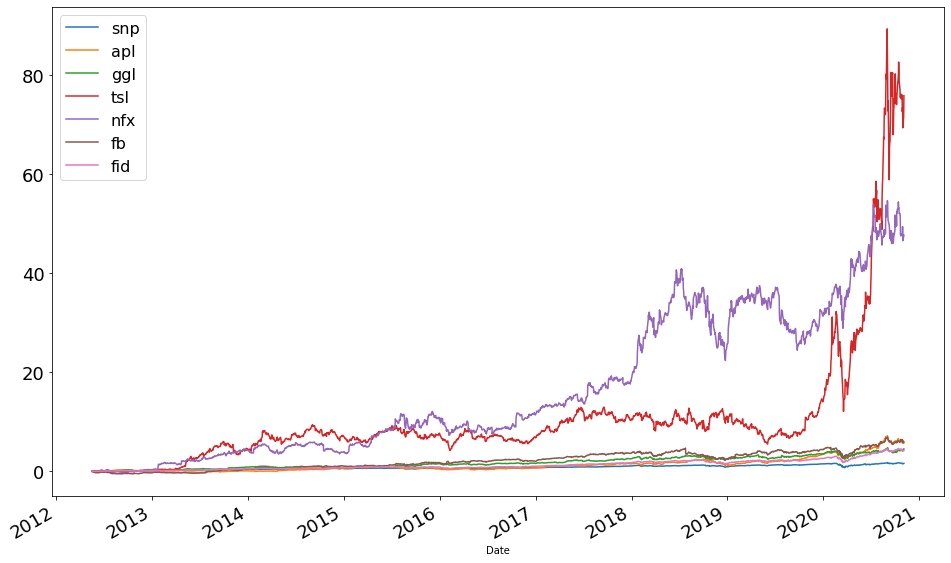

In [ ]:
# 초기시점을 0 으로 기준으로 잡고 상대 주가 (relative stock price) 를 표현해보자 

s_pr = stk / stk.iloc[0] - 1.0 

# 상대가격을 그래프로 그려보아요. 
plt.rcParams['legend.fontsize'] = 16
s_pr.plot( figsize=(16,10), fontsize=18)

In [ ]:
# 요인모형의 데이터 주기가 월별이랍니다. 그래서 일별 주가수익률의 자료를 월별 주가수익률 자료로 환산시켜줍니다. 
# 월별 수익률로 환산해 줍니다. 

s_retm= s_ret.resample('M').sum()
s_retm

,r_snp,r_apl,r_ggl,r_tsl,r_nfx,r_fb,r_fid
Date,,,,,,,
2012-05-31,1.189776,8.775683,-3.209451,7.497973,-9.148553,-23.709192,2.281315
2012-06-30,4.051099,1.259422,0.066935,7.004497,8.242886,6.027202,2.935285
2012-07-31,1.329112,4.723484,8.929896,-11.879240,-13.330352,-34.053312,0.528831
2012-08-31,1.993268,9.116548,8.034159,5.096211,5.520919,-16.863668,4.581669
2012-09-30,2.446543,0.478047,9.772297,4.090225,-8.398835,19.850826,2.216383
...,...,...,...,...,...,...,...
2020-07-31,5.443821,16.090065,5.101983,31.458877,8.266015,11.699297,8.033199
2020-08-31,6.808892,20.088175,9.879166,58.434237,8.995564,15.254531,12.031546
2020-09-30,-3.754252,-9.584767,-10.053979,-8.905243,-4.997872,-10.768389,-2.910333


In [ ]:
# date format: yyyy-mm-dd ==> yyyy-mm

s_retm = s_retm.to_period('M')
s_retm

,r_snp,r_apl,r_ggl,r_tsl,r_nfx,r_fb,r_fid
Date,,,,,,,
2012-05,1.189776,8.775683,-3.209451,7.497973,-9.148553,-23.709192,2.281315
2012-06,4.051099,1.259422,0.066935,7.004497,8.242886,6.027202,2.935285
2012-07,1.329112,4.723484,8.929896,-11.879240,-13.330352,-34.053312,0.528831
2012-08,1.993268,9.116548,8.034159,5.096211,5.520919,-16.863668,4.581669
2012-09,2.446543,0.478047,9.772297,4.090225,-8.398835,19.850826,2.216383
...,...,...,...,...,...,...,...
2020-07,5.443821,16.090065,5.101983,31.458877,8.266015,11.699297,8.033199
2020-08,6.808892,20.088175,9.879166,58.434237,8.995564,15.254531,12.031546
2020-09,-3.754252,-9.584767,-10.053979,-8.905243,-4.997872,-10.768389,-2.910333


In [ ]:
# 기초통계표 : 월별 수익률 
df=s_retm
stats = df.describe()
stats.loc['var'] = df.var().tolist()
stats.loc['skew'] = df.skew().tolist()
stats.loc['kurt'] = df.kurtosis().tolist()
print(stats)

            r_snp       r_apl       r_ggl       r_tsl       r_nfx        r_fb  \
count  103.000000  103.000000  103.000000  103.000000  103.000000  103.000000   
mean     1.046643    2.190972    1.923159    5.472435    4.697956    2.451863   
std      3.572488    7.865116    5.944702   16.390532   13.139836   10.349794   
min     -9.659446  -19.107633  -11.113489  -24.342824  -23.099162  -34.053312   
25%     -0.195840   -2.153554   -1.723039   -6.174370   -4.326865   -4.043730   
50%      1.570506    2.424485    1.858485    4.469543    5.368131    1.790537   
75%      2.959315    7.618797    5.678652   12.569223    9.426182    8.144714   
max     12.646589   20.088175   19.842690   66.164860   66.794365   43.253268   
var     12.762670   61.860043   35.339483  268.649538  172.655278  107.118237   
skew    -0.468191   -0.335348    0.337416    0.999762    1.230526    0.315004   
kurt     1.755010   -0.158535    0.542409    1.878024    4.474254    3.144797   

            r_fid  
count  

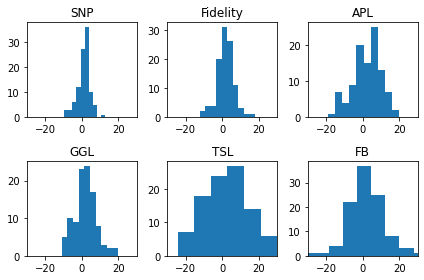

In [ ]:
# histogram

plt.subplot(231)
plt.hist(s_retm['r_snp'])
plt.title('SNP') 
plt.xlim(-30, 30) # set fixed y axis scale

plt.subplot(232)
plt.hist(s_retm['r_fid'])
plt.title('Fidelity') 
plt.xlim(-30, 30) # set fixed y axis scale

plt.subplot(233)
plt.hist(s_retm['r_apl'])
plt.title('APL') 
plt.xlim(-30, 30) # set fixed y axis scale

plt.subplot(234)
plt.hist(s_retm['r_ggl'])
plt.title('GGL') 
plt.xlim(-30, 30) # set fixed y axis scale

plt.subplot(235)
plt.hist(s_retm['r_tsl'])
plt.title('TSL') 
plt.xlim(-30, 30) # set fixed y axis scale

plt.subplot(236)
plt.hist(s_retm['r_fb'])
plt.title('FB') 
plt.xlim(-30, 30) # set fixed y axis scale

plt.tight_layout() # 그래프 겹치지 않게 
plt.show() 

In [ ]:
# Fama-French Factor Model의 데이터는 Ken French의 라이브러리에서 가져올 수 있답니다. (SCV 파일 이름을 파악할 것)
# 첫번째 데이터 묶음이 데이터입니다. 

# 5요인을 다운받도록 해요. (2000년 이후 있음)
ff5 = pdr.DataReader('F-F_Research_Data_5_Factors_2X3', 'famafrench', start, end)[0]
ff5

,Mkt-RF,SMB,HML,RMW,CMA,RF
Date,,,,,,
2000-01,-4.74,4.35,-1.46,-6.07,4.73,0.41
2000-02,2.45,18.05,-9.05,-18.48,-0.51,0.43
2000-03,5.20,-14.86,7.49,11.53,-1.05,0.47
2000-04,-6.40,-5.28,7.68,7.66,5.27,0.46
2000-05,-4.42,-4.06,4.91,4.36,0.74,0.50
...,...,...,...,...,...,...
2020-05,5.58,1.92,-4.95,0.71,-3.28,0.01
2020-06,2.46,1.94,-2.22,0.03,0.34,0.01
2020-07,5.77,-3.03,-1.31,0.55,1.06,0.01


In [ ]:
# 포트폴리오도 다운 받도록 해요 : 25 Portfolios Formed on Size and Book-to-Market (5 x 5)
ffp = pdr.DataReader('25_Portfolios_5x5', 'famafrench', start, end)[0]
ffp

,SMALL LoBM,ME1 BM2,ME1 BM3,ME1 BM4,SMALL HiBM,ME2 BM1,ME2 BM2,ME2 BM3,ME2 BM4,ME2 BM5,...,ME4 BM1,ME4 BM2,ME4 BM3,ME4 BM4,ME4 BM5,BIG LoBM,ME5 BM2,ME5 BM3,ME5 BM4,BIG HiBM
Date,,,,,,,,,,,,,,,,,,,,,
2000-01,9.6286,6.3615,4.9351,3.4844,5.0194,0.2394,-1.7549,-3.2922,0.9305,-2.8484,...,-3.9086,-3.5063,-3.7924,-4.0492,-9.2751,-4.9654,-3.8525,-4.9784,-6.7075,-9.0658
2000-02,38.3214,42.4214,21.0566,26.3689,14.7430,28.1148,18.5182,3.2152,9.8939,14.3692,...,26.0441,0.6335,-2.4163,2.9911,-3.7066,0.3695,-5.6415,-7.6176,-10.2472,-10.7792
2000-03,-13.6965,-19.4849,-8.0186,-7.7281,-2.4755,-13.2249,-5.9305,1.1186,-0.8616,-2.6620,...,-3.0763,12.6931,14.7050,9.8484,12.8903,9.2370,11.2394,10.0274,15.8776,21.4935
2000-04,-23.6139,-17.9621,-10.0048,-11.5807,-9.9033,-11.8025,-9.0504,-4.2752,-3.4077,-2.7539,...,-7.1800,-2.9792,2.5431,1.5937,1.5979,-4.2890,-2.6495,0.3384,2.9508,-0.6757
2000-05,-14.5688,-9.2393,-5.6934,-7.5324,-6.6969,-9.9534,-5.6163,-5.0687,-7.2787,-1.3077,...,-7.5602,0.7759,-0.1485,-2.1743,0.9875,-3.4862,-1.5362,4.9492,1.5819,6.4563
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05,13.5510,6.4995,6.6352,4.2937,4.3929,10.1370,7.2505,4.0887,1.4932,6.4071,...,10.6434,8.2561,5.9748,3.3347,1.9301,5.6458,5.5022,3.7983,1.1571,3.7987
2020-06,11.0265,2.4121,6.8074,4.4294,6.0512,5.4178,2.9359,3.6917,2.8693,2.8376,...,2.1565,0.6645,-0.7638,2.6486,1.8758,5.1105,-1.0308,-0.6403,-1.8727,2.1123
2020-07,-0.1979,1.4666,2.8173,-0.5918,5.0195,0.8439,3.6578,3.3505,1.9185,2.9552,...,5.9581,7.6874,6.3603,2.7130,2.2014,7.7238,5.1651,4.3200,1.7426,2.9417


In [ ]:
ff = pd.merge(ff5, ffp,left_index=True, right_index=True, how='inner')
ff

,Mkt-RF,SMB,HML,RMW,CMA,RF,SMALL LoBM,ME1 BM2,ME1 BM3,ME1 BM4,...,ME4 BM1,ME4 BM2,ME4 BM3,ME4 BM4,ME4 BM5,BIG LoBM,ME5 BM2,ME5 BM3,ME5 BM4,BIG HiBM
Date,,,,,,,,,,,,,,,,,,,,,
2000-01,-4.74,4.35,-1.46,-6.07,4.73,0.41,9.6286,6.3615,4.9351,3.4844,...,-3.9086,-3.5063,-3.7924,-4.0492,-9.2751,-4.9654,-3.8525,-4.9784,-6.7075,-9.0658
2000-02,2.45,18.05,-9.05,-18.48,-0.51,0.43,38.3214,42.4214,21.0566,26.3689,...,26.0441,0.6335,-2.4163,2.9911,-3.7066,0.3695,-5.6415,-7.6176,-10.2472,-10.7792
2000-03,5.20,-14.86,7.49,11.53,-1.05,0.47,-13.6965,-19.4849,-8.0186,-7.7281,...,-3.0763,12.6931,14.7050,9.8484,12.8903,9.2370,11.2394,10.0274,15.8776,21.4935
2000-04,-6.40,-5.28,7.68,7.66,5.27,0.46,-23.6139,-17.9621,-10.0048,-11.5807,...,-7.1800,-2.9792,2.5431,1.5937,1.5979,-4.2890,-2.6495,0.3384,2.9508,-0.6757
2000-05,-4.42,-4.06,4.91,4.36,0.74,0.50,-14.5688,-9.2393,-5.6934,-7.5324,...,-7.5602,0.7759,-0.1485,-2.1743,0.9875,-3.4862,-1.5362,4.9492,1.5819,6.4563
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05,5.58,1.92,-4.95,0.71,-3.28,0.01,13.5510,6.4995,6.6352,4.2937,...,10.6434,8.2561,5.9748,3.3347,1.9301,5.6458,5.5022,3.7983,1.1571,3.7987
2020-06,2.46,1.94,-2.22,0.03,0.34,0.01,11.0265,2.4121,6.8074,4.4294,...,2.1565,0.6645,-0.7638,2.6486,1.8758,5.1105,-1.0308,-0.6403,-1.8727,2.1123
2020-07,5.77,-3.03,-1.31,0.55,1.06,0.01,-0.1979,1.4666,2.8173,-0.5918,...,5.9581,7.6874,6.3603,2.7130,2.2014,7.7238,5.1651,4.3200,1.7426,2.9417


In [ ]:
# 기초통계표 : 5요인 
df=ff5
stats = df.describe()
stats.loc['var'] = df.var().tolist()
stats.loc['skew'] = df.skew().tolist()
stats.loc['kurt'] = df.kurtosis().tolist()
print(stats)

           Mkt-RF         SMB         HML         RMW         CMA          RF
count  249.000000  249.000000  249.000000  249.000000  249.000000  249.000000
mean     0.494538    0.226386    0.066747    0.405341    0.241888    0.131486
std      4.524600    3.077449    3.264027    2.919628    2.053194    0.150399
min    -17.230000  -14.860000  -14.110000  -18.480000   -6.550000    0.000000
25%     -1.970000   -1.490000   -1.700000   -0.940000   -1.050000    0.010000
50%      1.100000    0.160000   -0.110000    0.420000   -0.010000    0.090000
75%      3.230000    1.990000    1.640000    1.490000    1.210000    0.190000
max     13.650000   18.050000   12.600000   13.380000    9.560000    0.560000
var     20.472003    9.470693   10.653873    8.524227    4.215606    0.022620
skew    -0.572787    0.431988    0.130122   -0.417585    0.984480    1.095912
kurt     1.000671    6.041574    3.177695    9.534314    2.933204    0.074942


In [ ]:
ff5.corr()

,Mkt-RF,SMB,HML,RMW,CMA,RF
Mkt-RF,1.000000,0.283529,-0.012309,-0.403989,-0.245703,-0.158444
SMB,0.283529,1.000000,0.013259,-0.478296,0.025402,0.000069
HML,-0.012309,0.013259,1.000000,0.411450,0.599068,0.183361
RMW,-0.403989,-0.478296,0.411450,1.000000,0.274785,0.122855
CMA,-0.245703,0.025402,0.599068,0.274785,1.000000,0.184623
RF,-0.158444,0.000069,0.183361,0.122855,0.184623,1.000000


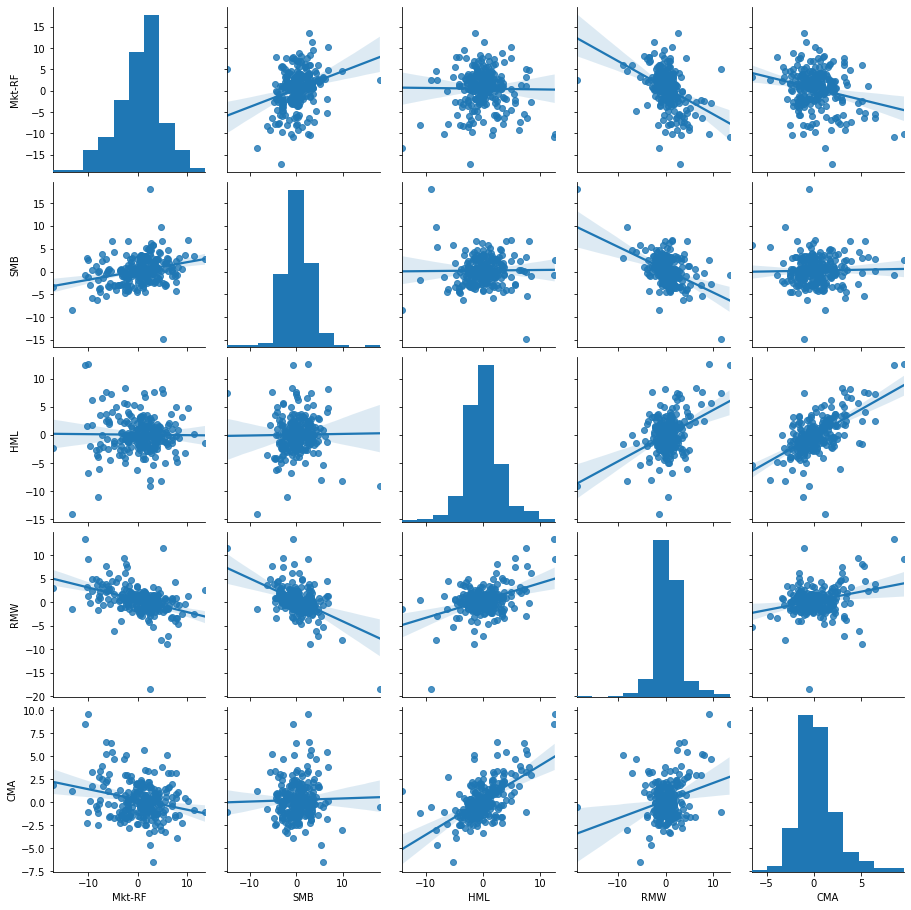

In [ ]:
# Pairplot: scatter matrices

sns.pairplot(data=ff, vars=['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA'],
                 kind='reg')  

C:\Users\CAU\AppData\Roaming\Python\Python38\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 45572 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\CAU\AppData\Roaming\Python\Python38\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 51201 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\CAU\AppData\Roaming\Python\Python38\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\CAU\AppData\Roaming\Python\Python38\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 51061 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\CAU\AppData\Roaming\Python\Python38\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 45572 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\CAU\AppData\Roaming\Python\Python38\si

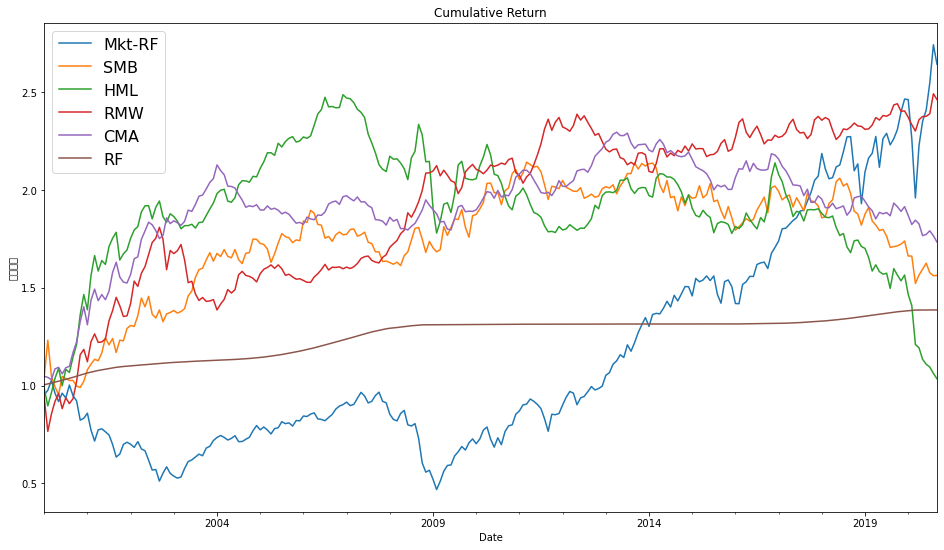

In [ ]:
# 요인별 누적 수익률 그래프를 그려보아요. 

ff5_cumr = (1+ff5/100).cumprod()
ff5_cumr

ff5_cumr.plot(figsize=(16,9)) 
plt.title('Cumulative Return') 
plt.xlabel('Date') 
plt.ylabel('누적수익') 
plt.legend();

In [ ]:
# 주가 수익률 (yahoo finance에서 다운, 5요인과 포트폴리오 (Ken French Lib 에서 다운) 을 머지해주세요

df = pd.merge(ff, s_retm,left_index=True, right_index=True, how='inner')
df

,Mkt-RF,SMB,HML,RMW,CMA,RF,SMALL LoBM,ME1 BM2,ME1 BM3,ME1 BM4,...,ME5 BM3,ME5 BM4,BIG HiBM,r_snp,r_apl,r_ggl,r_tsl,r_nfx,r_fb,r_fid
Date,,,,,,,,,,,,,,,,,,,,,
2012-05,-6.19,-0.03,-0.78,2.50,2.41,0.01,-8.3846,-6.2737,-7.0687,-7.9899,...,-5.3432,-2.4045,-12.8931,1.189776,8.775683,-3.209451,7.497973,-9.148553,-23.709192,2.281315
2012-06,3.89,0.94,0.63,-1.26,0.32,0.00,7.3027,7.2355,6.1497,5.4019,...,5.4705,5.0600,5.6172,4.051099,1.259422,0.066935,7.004497,8.242886,6.027202,2.935285
2012-07,0.79,-2.68,-0.07,0.93,0.10,0.00,-2.6446,1.6452,-3.1990,-1.5915,...,1.8072,0.8923,-1.5387,1.329112,4.723484,8.929896,-11.879240,-13.330352,-34.053312,0.528831
2012-08,2.55,0.43,1.21,-1.42,-0.72,0.01,2.6251,0.3026,4.0148,2.6994,...,1.3747,0.5456,6.6192,1.993268,9.116548,8.034159,5.096211,5.520919,-16.863668,4.581669
2012-09,2.73,0.65,1.53,-1.32,1.60,0.01,4.9025,5.2972,4.4821,4.6480,...,3.5991,3.2534,5.5526,2.446543,0.478047,9.772297,4.090225,-8.398835,19.850826,2.216383
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05,5.58,1.92,-4.95,0.71,-3.28,0.01,13.5510,6.4995,6.6352,4.2937,...,3.7983,1.1571,3.7987,4.631824,8.324986,5.939074,7.800948,0.272518,9.825448,9.955979
2020-06,2.46,1.94,-2.22,0.03,0.34,0.01,11.0265,2.4121,6.8074,4.4294,...,-0.6403,-1.8727,2.1123,2.189460,14.210413,-0.674312,27.608128,8.523823,1.700310,7.795883
2020-07,5.77,-3.03,-1.31,0.55,1.06,0.01,-0.1979,1.4666,2.8173,-0.5918,...,4.3200,1.7426,2.9417,5.443821,16.090065,5.101983,31.458877,8.266015,11.699297,8.033199


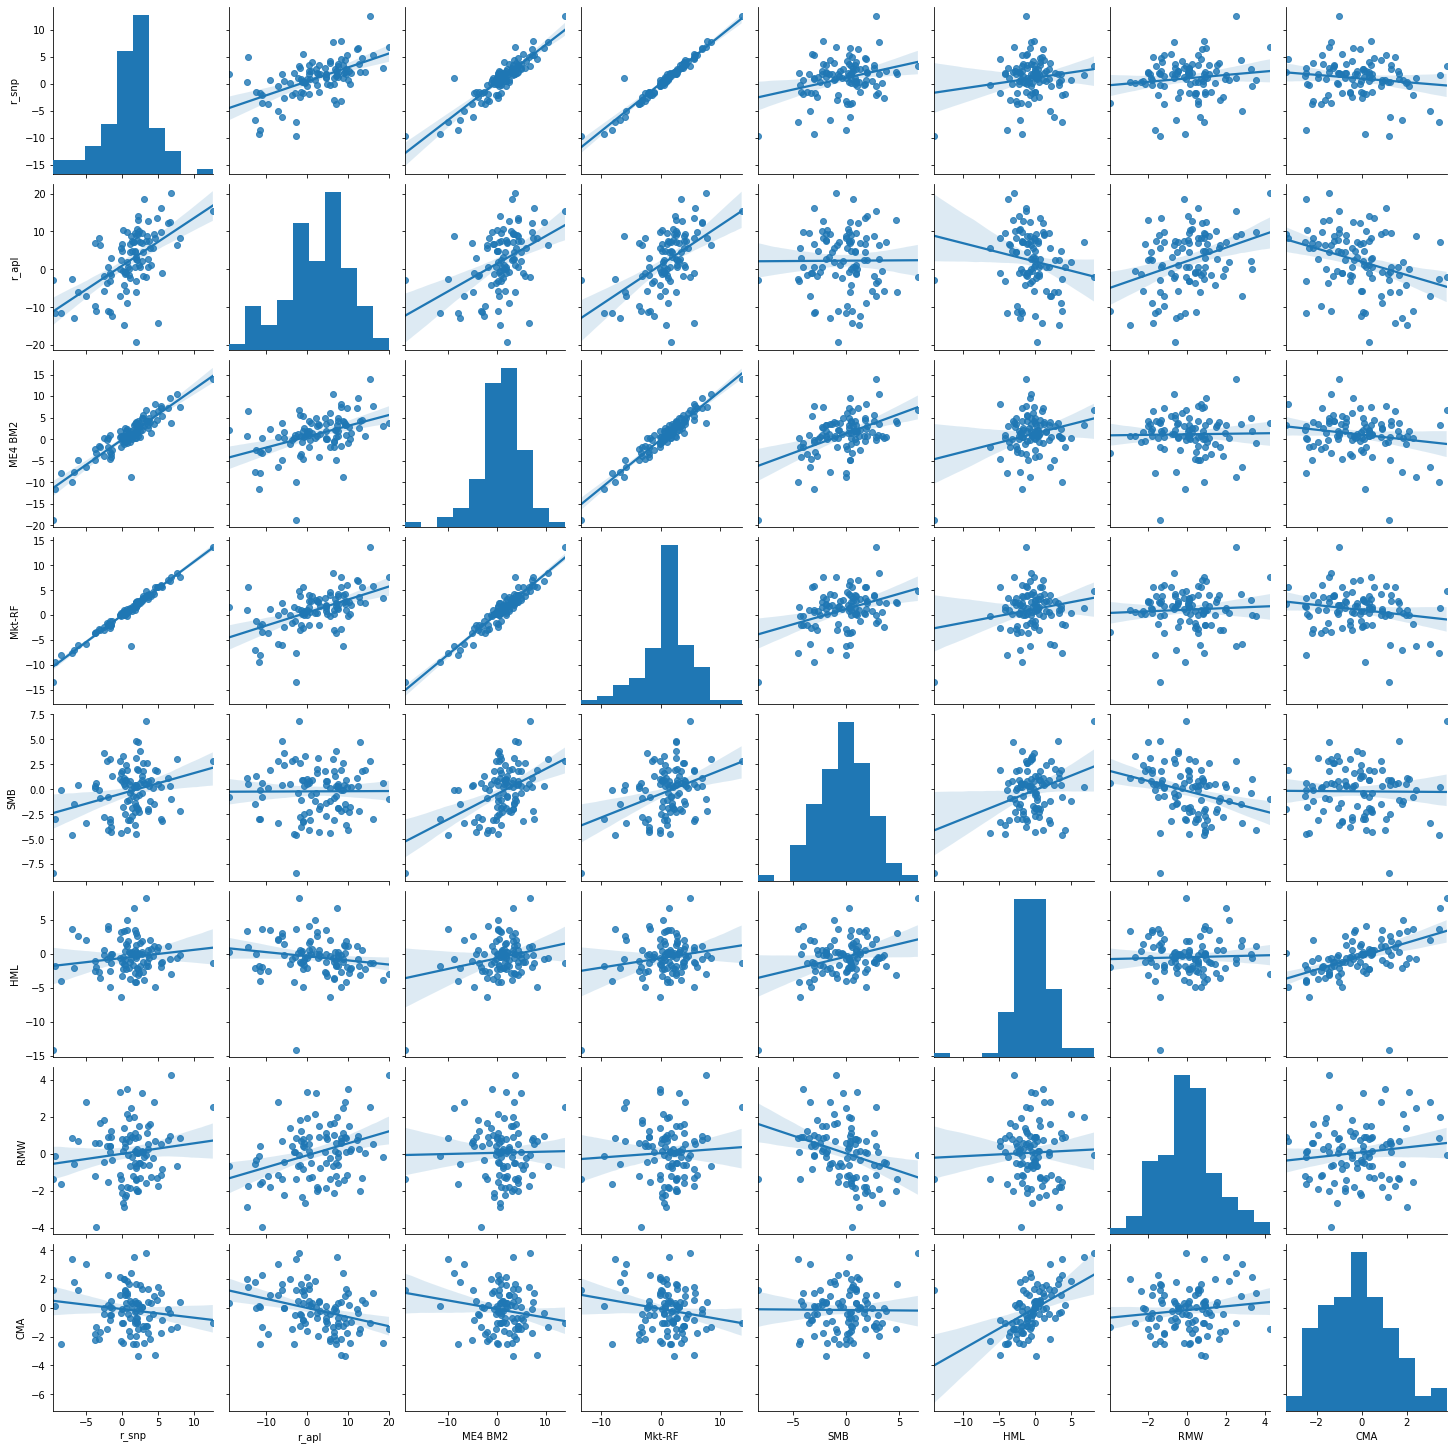

In [ ]:
# Pairplot: scatter matrices

sns.pairplot(data=df, vars=['r_snp','r_apl', 'ME4 BM2', 'Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA'],
                 kind='reg')  

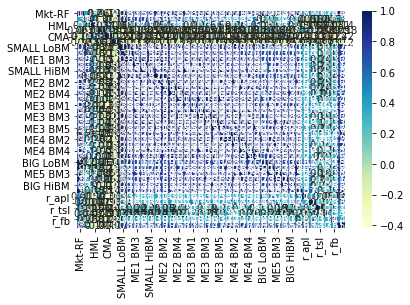

In [ ]:
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")
plt.show()

In [ ]:
# 포트폴리오 수익률에서 무위험 수익률을 빼주어요. 이것은 모형추정의 종속변수를 만드는 과정이랍니다. 

df['r_snp_rf'] = df.r_snp - df.RF
df

,Mkt-RF,SMB,HML,RMW,CMA,RF,SMALL LoBM,ME1 BM2,ME1 BM3,ME1 BM4,...,ME5 BM4,BIG HiBM,r_snp,r_apl,r_ggl,r_tsl,r_nfx,r_fb,r_fid,r_snp_rf
Date,,,,,,,,,,,,,,,,,,,,,
2012-05,-6.19,-0.03,-0.78,2.50,2.41,0.01,-8.3846,-6.2737,-7.0687,-7.9899,...,-2.4045,-12.8931,1.189776,8.775683,-3.209451,7.497973,-9.148553,-23.709192,2.281315,1.179776
2012-06,3.89,0.94,0.63,-1.26,0.32,0.00,7.3027,7.2355,6.1497,5.4019,...,5.0600,5.6172,4.051099,1.259422,0.066935,7.004497,8.242886,6.027202,2.935285,4.051099
2012-07,0.79,-2.68,-0.07,0.93,0.10,0.00,-2.6446,1.6452,-3.1990,-1.5915,...,0.8923,-1.5387,1.329112,4.723484,8.929896,-11.879240,-13.330352,-34.053312,0.528831,1.329112
2012-08,2.55,0.43,1.21,-1.42,-0.72,0.01,2.6251,0.3026,4.0148,2.6994,...,0.5456,6.6192,1.993268,9.116548,8.034159,5.096211,5.520919,-16.863668,4.581669,1.983268
2012-09,2.73,0.65,1.53,-1.32,1.60,0.01,4.9025,5.2972,4.4821,4.6480,...,3.2534,5.5526,2.446543,0.478047,9.772297,4.090225,-8.398835,19.850826,2.216383,2.436543
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05,5.58,1.92,-4.95,0.71,-3.28,0.01,13.5510,6.4995,6.6352,4.2937,...,1.1571,3.7987,4.631824,8.324986,5.939074,7.800948,0.272518,9.825448,9.955979,4.621824
2020-06,2.46,1.94,-2.22,0.03,0.34,0.01,11.0265,2.4121,6.8074,4.4294,...,-1.8727,2.1123,2.189460,14.210413,-0.674312,27.608128,8.523823,1.700310,7.795883,2.179460
2020-07,5.77,-3.03,-1.31,0.55,1.06,0.01,-0.1979,1.4666,2.8173,-0.5918,...,1.7426,2.9417,5.443821,16.090065,5.101983,31.458877,8.266015,11.699297,8.033199,5.433821


In [ ]:
# 이제 종속변수와 설명변수 행렬을 구성해주어요. 
# 설명변수 행렬은 절편(1로 구성된 column vecctor)을 포함시켜주어요. 
y=df['r_snp_rf']
X=df[['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA']]
X = sm.add_constant(X)
X

,const,Mkt-RF,SMB,HML,RMW,CMA
Date,,,,,,
2012-05,1.0,-6.19,-0.03,-0.78,2.50,2.41
2012-06,1.0,3.89,0.94,0.63,-1.26,0.32
2012-07,1.0,0.79,-2.68,-0.07,0.93,0.10
2012-08,1.0,2.55,0.43,1.21,-1.42,-0.72
2012-09,1.0,2.73,0.65,1.53,-1.32,1.60
...,...,...,...,...,...,...
2020-05,1.0,5.58,1.92,-4.95,0.71,-3.28
2020-06,1.0,2.46,1.94,-2.22,0.03,0.34
2020-07,1.0,5.77,-3.03,-1.31,0.55,1.06


In [ ]:
# 이제 선형회귀식을 추정해보아요. 

olsreg = sm.OLS(y, X)
result =olsreg.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               r_snp_rf   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     469.3
Date:                Wed, 04 Nov 2020   Prob (F-statistic):           2.59e-65
Time:                        12:02:16   Log-Likelihood:                -108.05
No. Observations:                 101   AIC:                             228.1
Df Residuals:                      95   BIC:                             243.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0312      0.078     -0.399      0.691      -0.186       0.124
Mkt-RF         0.9245      0.021     43.158      0.000       0.882       0.967
SMB           -0.0691      0.036     -1.915      0.059      -0.141       0.003
HML           -0.0936      0.034     -2.729      0.008      -0.162      -0.026
RMW            0.1129      0.053      2.135      0.035       0.008       0.218
CMA            0.2018      0.062      3.264      0.002       0.079       0.324
==============================================================================
Omnibus:                      167.418   Durbin-Watson:                   1.131
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12159.969
Skew:                           6.227   Prob(JB):                         0.00
Kurtosis:                      55.292   Cond. No.                         4.73
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# CAPM, FF Three-Factor, FF Five-Factor Model을 동시에 추정해서 출력을 비교하고자 다음 함수를 정의합니다.


def FFReg(df_stk):
    import pandas_datareader.data as web  # 필요한 lib들을 불러보아요 
    import statsmodels.formula.api as sm # 모형 추정
    from statsmodels.iolib.summary2 import summary_col # 추정결과 출력 

    # Reading in factor data
    df_factors = web.DataReader('F-F_Research_Data_5_Factors_2x3', 'famafrench')[0] # fama-french 5요인을 다운 받아요 
    df_factors.rename(columns={'Mkt-RF': 'MKT'}, inplace=True) # 시장요인 변수명을 변경해주어요. 
    df_factors['MKT'] = df_factors['MKT']
    df_factors['SMB'] = df_factors['SMB'] 
    df_factors['HML'] = df_factors['HML'] 
    df_factors['RMW'] = df_factors['RMW'] 
    df_factors['CMA'] = df_factors['CMA'] 
    
    # 요인 데이터와 수익률 데이터 머지하면서 표본 기간이 일치하게 되요. 
    df_stock_factor = pd.merge(df_stk,df_factors,left_index=True,right_index=True) # 대상 자산 수익률과  요인 자료를 머지 (monthly data, %)
    df_stock_factor['XRet'] = df_stock_factor['Returns'] - df_stock_factor['RF'] # 초과수익률

    # 회귀분석 모형: CAPM, FF3, and FF5 
    CAPM = sm.ols(formula = 'XRet ~ MKT', data=df_stock_factor).fit(cov_type='HAC',cov_kwds={'maxlags':1})
    FF3 = sm.ols( formula = 'XRet ~ MKT + SMB + HML', data=df_stock_factor).fit(cov_type='HAC',cov_kwds={'maxlags':1})
    FF5 = sm.ols( formula = 'XRet ~ MKT + SMB + HML + RMW + CMA', data=df_stock_factor).fit(cov_type='HAC',cov_kwds={'maxlags':1})

    CAPMtstat = CAPM.tvalues
    FF3tstat = FF3.tvalues
    FF5tstat = FF5.tvalues

    CAPMcoeff = CAPM.params
    FF3coeff = FF3.params
    FF5coeff = FF5.params

    # 추정치와  t-값을 가지고 DataFrame을 만듬 
    results_df = pd.DataFrame({'CAPMcoeff':CAPMcoeff,'CAPMtstat':CAPMtstat,
                               'FF3coeff':FF3coeff, 'FF3tstat':FF3tstat,
                               'FF5coeff':FF5coeff, 'FF5tstat':FF5tstat},
    index = ['Intercept', 'MKT', 'SMB', 'HML', 'RMW', 'CMA'])


    dfoutput = summary_col([CAPM,FF3, FF5],stars=True,float_format='%0.3f',
                  model_names=['CAPM','FF3','FF5'],
                  info_dict={'N':lambda x: "{0:d}".format(int(x.nobs)),
                             'Adjusted R^2':lambda x: "{:.3f}".format(x.rsquared_adj)}, 
                             regressor_order = ['Intercept', 'MKT', 'SMB', 'HML', 'RMW', 'CMA'])

    print(dfoutput)
    
    return results_df

In [ ]:
df['Returns'] = df.r_snp  
df_1 =df[['Returns']]
FFReg(df_1)


               CAPM      FF3       FF5   
-----------------------------------------
Intercept    -0.050   -0.152*** -0.175***
             (0.077)  (0.046)   (0.041)  
MKT          0.904*** 0.944***  0.963*** 
             (0.026)  (0.014)   (0.014)  
SMB                   -0.119*** -0.114***
                      (0.020)   (0.019)  
HML                   -0.034    -0.077** 
                      (0.028)   (0.033)  
RMW                             -0.005   
                                (0.027)  
CMA                             0.137**  
                                (0.054)  
R-squared    0.985    0.992     0.994    
             0.986    0.992     0.994    
N            59       59        59       
Adjusted R^2 0.985    0.992     0.994    
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


,CAPMcoeff,CAPMtstat,FF3coeff,FF3tstat,FF5coeff,FF5tstat
Intercept,-0.049513,-0.644811,-0.151910,-3.327354,-0.174819,-4.271663
MKT,0.903680,34.482052,0.943799,68.498260,0.963087,67.612454
SMB,NaN,NaN,-0.119494,-6.048135,-0.114200,-6.169324
HML,NaN,NaN,-0.033964,-1.204343,-0.077148,-2.366068
RMW,NaN,NaN,NaN,NaN,-0.005459,-0.202541
CMA,NaN,NaN,NaN,NaN,0.137303,2.523594


In [ ]:
df['Returns'] = df.r_apl 
df_1 =df[['Returns']]
FFReg(df_1)


               CAPM      FF3      FF5   
----------------------------------------
Intercept    1.500*   0.500     0.622   
             (0.809)  (0.794)   (0.778) 
MKT          1.177*** 1.441***  1.177***
             (0.205)  (0.208)   (0.256) 
SMB                   -0.505    -0.290  
                      (0.348)   (0.356) 
HML                   -0.658*** -0.450  
                      (0.239)   (0.275) 
RMW                             1.030*  
                                (0.587) 
CMA                             -0.928  
                                (0.569) 
R-squared    0.365    0.448     0.471   
             0.376    0.476     0.517   
N            59       59        59      
Adjusted R^2 0.365    0.448     0.471   
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


,CAPMcoeff,CAPMtstat,FF3coeff,FF3tstat,FF5coeff,FF5tstat
Intercept,1.499735,1.854516,0.500485,0.630226,0.621962,0.799091
MKT,1.177016,5.735597,1.440868,6.937413,1.177203,4.601363
SMB,NaN,NaN,-0.505397,-1.451550,-0.289792,-0.814197
HML,NaN,NaN,-0.658438,-2.757239,-0.450466,-1.640107
RMW,NaN,NaN,NaN,NaN,1.029761,1.754304
CMA,NaN,NaN,NaN,NaN,-0.927657,-1.630560


In [ ]:
df['Returns'] = df.r_tsl
df_1 =df[['Returns']]
FFReg(df_1)


               CAPM     FF3      FF5   
---------------------------------------
Intercept    3.649*   2.355    2.195   
             (2.091)  (1.970)  (2.016) 
MKT          1.551*** 1.958*** 2.002***
             (0.551)  (0.630)  (0.618) 
SMB                   -0.992   -0.818  
                      (0.875)  (0.849) 
HML                   -0.686   -0.999  
                      (0.686)  (0.742) 
RMW                            0.522   
                               (1.537) 
CMA                            0.846   
                               (1.269) 
R-squared    0.161    0.183    0.160   
             0.175    0.225    0.232   
N            59       59       59      
Adjusted R^2 0.161    0.183    0.160   
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


,CAPMcoeff,CAPMtstat,FF3coeff,FF3tstat,FF5coeff,FF5tstat
Intercept,3.649171,1.745096,2.354588,1.195183,2.194842,1.088523
MKT,1.551398,2.813632,1.958293,3.109285,2.002453,3.239108
SMB,NaN,NaN,-0.991502,-1.133414,-0.818164,-0.963589
HML,NaN,NaN,-0.686386,-1.000493,-0.999277,-1.347554
RMW,NaN,NaN,NaN,NaN,0.522198,0.339756
CMA,NaN,NaN,NaN,NaN,0.845705,0.666175


In [ ]:
df['Returns'] = df['SMALL LoBM']
df_1 =df[['Returns']]
FFReg(df_1)


               CAPM      FF3       FF5   
-----------------------------------------
Intercept    -0.313   -0.094    -0.050   
             (0.518)  (0.349)   (0.297)  
MKT          1.334*** 0.991***  1.043*** 
             (0.148)  (0.111)   (0.098)  
SMB                   1.585***  1.441*** 
                      (0.144)   (0.138)  
HML                   -0.586*** -0.491***
                      (0.096)   (0.124)  
RMW                             -0.542** 
                                (0.230)  
CMA                             -0.156   
                                (0.172)  
R-squared    0.648    0.880     0.888    
             0.654    0.886     0.898    
N            59       59        59       
Adjusted R^2 0.648    0.880     0.888    
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


,CAPMcoeff,CAPMtstat,FF3coeff,FF3tstat,FF5coeff,FF5tstat
Intercept,-0.312592,-0.603274,-0.094065,-0.269816,-0.049611,-0.167200
MKT,1.333628,8.994059,0.990960,8.931818,1.042659,10.590870
SMB,NaN,NaN,1.585438,11.013176,1.440584,10.433103
HML,NaN,NaN,-0.585975,-6.091038,-0.490571,-3.945686
RMW,NaN,NaN,NaN,NaN,-0.542131,-2.355964
CMA,NaN,NaN,NaN,NaN,-0.156208,-0.906066


In [ ]:
df['Returns'] = df['BIG HiBM']
df_1 =df[['Returns']]
FFReg(df_1)


               CAPM     FF3       FF5   
----------------------------------------
Intercept    -0.989** -0.027   0.109    
             (0.499)  (0.364)  (0.227)  
MKT          1.411*** 1.223*** 1.233*** 
             (0.121)  (0.070)  (0.057)  
SMB                   0.144    -0.074   
                      (0.120)  (0.104)  
HML                   0.803*** 1.076*** 
                      (0.092)  (0.091)  
RMW                            -0.736***
                               (0.164)  
CMA                            -0.661***
                               (0.170)  
R-squared    0.771    0.909    0.949    
             0.775    0.914    0.954    
N            59       59       59       
Adjusted R^2 0.771    0.909    0.949    
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


,CAPMcoeff,CAPMtstat,FF3coeff,FF3tstat,FF5coeff,FF5tstat
Intercept,-0.989410,-1.984541,-0.027283,-0.074959,0.108546,0.477787
MKT,1.410951,11.657489,1.223049,17.431411,1.232621,21.709964
SMB,NaN,NaN,0.144252,1.206083,-0.074283,-0.713773
HML,NaN,NaN,0.803423,8.735921,1.075605,11.770402
RMW,NaN,NaN,NaN,NaN,-0.736227,-4.488793
CMA,NaN,NaN,NaN,NaN,-0.660813,-3.896559
